In [ ]:
import pandas as pd # for data manipulation
import numpy as np # for numerical computations
import matplotlib.pyplot as plt
import seaborn as sns # for data visualization
import scipy as sp # for scientific computing
import sklearn as sk # for machine learning
import missingno as msno # for visualizing missing data


df = pd.read_csv("heart.csv")
#print(df.shape) # rows = 1025, columns = 14

if df.isnull().sum().sum() > 0: # Check for missing values
    df = df.dropna() # Remove missing values

# Remove duplicates
df = df.drop_duplicates()


# one hot encoding for categorical columns
df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True) # converts categorical columns into multiple 
#binary (0/1) columns so that machine-learning models can use them correctly.

Here we visualize the relationship between age and cholestrol levels, but we use the normilzed age and cholestrol. For this to be working 
we have to scale our input and output variables. This is done using the "MinMaxScaler()" method from sklearn.


Training Shape: (241, 19), Testing Shape: (61, 19)
correlation coefficient (r): 0.2072155056561177


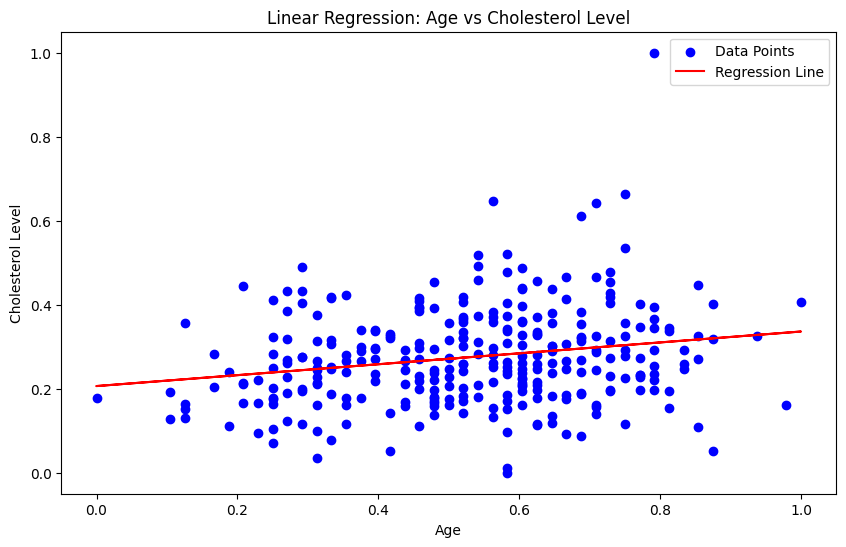

In [ ]:
X = df.drop('target', axis=1) # The input variables used to predict something (e.g., age, blood pressure, sex).
Y = df['target'] # The output variable we want to predict (e.g., presence of heart disease). 


# Splitting the dataset into training and testing sets (80% train, 20% test).
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X, Y, test_size=0.2, random_state=42)  



scaler = sk.preprocessing.MinMaxScaler() # Scale features to a range (0, 1)
X_train = scaler.fit_transform(X_train) # Fit scaler on training data and transform it
X_test = scaler.transform(X_test) # Transform test data using the same scaler

print(f"\nTraining Shape: {X_train.shape}, Testing Shape: {X_test.shape}")

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns) # Create a scaled DataFrame for analysis

#use linear regression to find relationship between age and cholesterol
x_reg = df_scaled['age'].values # Independent variable (age)
y_reg = df_scaled['chol'].values # normal chol values = [125, 200], Dependent variable (cholesterol)

regression_results = sp.stats.linregress(x_reg, y_reg) # Perform linear regression on age and cholesterol

slope = regression_results.slope # Slope of the regression line
intercept = regression_results.intercept # Intercept of the regression line
r_value = regression_results.rvalue # Correlation coefficient
p_value = regression_results.pvalue # P-value for the hypothesis test
std_r = regression_results.stderr # Standard error of the estimate

mymodel = []
for age in x_reg:
    predicted_cholesterol = slope * age + intercept
    mymodel.append(predicted_cholesterol)
    predicted_cholesterol = np.vectorize(lambda age: slope * age + intercept) # Vectorized function for predictions

print(f"correlation coefficient (r): {r_value}")
plt.figure(figsize=(10, 6))
plt.scatter(x_reg, y_reg, color='blue', label='Data Points') # Scatter plot of age vs cholesterol
plt.plot(x_reg, predicted_cholesterol(x_reg), color='red', label='Regression Line') # Regression line
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.title('Linear Regression: Age vs Cholesterol Level')
plt.legend()
plt.show()
